In [42]:
#Importing Libraries

In [43]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [44]:
# Reading the individual files and merging them to 1 file

In [45]:
all_files = ['Workflow_Jan2019.csv',
             'Workflow_Feb2019.csv',
             'Workflow_Mar2019.csv',
             'Workflow_Apr2019.csv',
             'Workflow_May2019.csv',
             'Workflow_Jun2019.csv']
df_from_each_file = (pd.read_csv(f, index_col=[0]) for f in all_files)
concatenated_df   = pd.concat(df_from_each_file, ignore_index=True)

In [46]:
concatenated_df.head()

,EntityType,ReportingDate,ReportType,AgingDay,MurexRef,LatestTradeReason,TraderId_Insert,InstrumentName,Family,Group,Type,TradeDate,TradeTime,EventAging,Portfolio
0,A,02/01/2019,CNR,2,142001107,OWN,T_44,HKD DEPOSIT,IRD,LN_BR,NaN,02/01/2019,10:28:10,0,CRD IDBO A_SG
1,A,02/01/2019,CNR,0,142003352,OTH,T_93,S&P 500 MINI,EQD,FUT,NaN,02/01/2019,10:45:44,0,BEZ A_SG LDN
2,A,02/01/2019,CNR,0,142003617,OTH,T_93,S&P 500 MINI,EQD,FUT,NaN,02/01/2019,10:47:14,0,OP PVT A_SG FX
3,A,02/01/2019,CNR,2,142003752,OWN,T_5,USD/HKD,CURR,FXD,SWLEG,02/01/2019,10:02:54,0,G7 A_SG GAP
4,A,02/01/2019,CNR,2,142003753,OWN,T_5,USD/HKD,CURR,FXD,SWLEG,02/01/2019,10:02:54,0,A_SG AMM YYG


In [47]:
concatenated_df.sample(5, random_state=5).T

,12829,229,17674,17156,6835
EntityType,A,A,A,A,A
ReportingDate,26/04/2019,04/01/2019,13/06/2019,10/06/2019,05/03/2019
ReportType,CNR,CNR,CNR,CNR,CNR
AgingDay,0,0,0,0,0
MurexRef,146951654,142169355,140815639,148680963,144630443
LatestTradeReason,OTH,OTH,OTH,OWN,OTH
TraderId_Insert,T_12,T_1,T_16,T_32,T_3
InstrumentName,USD IRS FA,MAS MD18151X,USD BSSGD 6M6M,ENRANGE6331,USD/EUR
Family,IRD,IRD,IRD,IRD,CURR
Group,IRS,BOND,CS,BOND,FXD


In [48]:
concatenated_df.drop_duplicates()

,EntityType,ReportingDate,ReportType,AgingDay,MurexRef,LatestTradeReason,TraderId_Insert,InstrumentName,Family,Group,Type,TradeDate,TradeTime,EventAging,Portfolio
0,A,02/01/2019,CNR,2,142001107,OWN,T_44,HKD DEPOSIT,IRD,LN_BR,NaN,02/01/2019,10:28:10,0,CRD IDBO A_SG
1,A,02/01/2019,CNR,0,142003352,OTH,T_93,S&P 500 MINI,EQD,FUT,NaN,02/01/2019,10:45:44,0,BEZ A_SG LDN
2,A,02/01/2019,CNR,0,142003617,OTH,T_93,S&P 500 MINI,EQD,FUT,NaN,02/01/2019,10:47:14,0,OP PVT A_SG FX
3,A,02/01/2019,CNR,2,142003752,OWN,T_5,USD/HKD,CURR,FXD,SWLEG,02/01/2019,10:02:54,0,G7 A_SG GAP
4,A,02/01/2019,CNR,2,142003753,OWN,T_5,USD/HKD,CURR,FXD,SWLEG,02/01/2019,10:02:54,0,A_SG AMM YYG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19022,A,28/06/2019,CNR,0,149655866,OTH,T_3,USD/SGD,CURR,FXD,FXD,28/06/2019,17:56:29,0,CASH A_SG G7
19023,A,28/06/2019,CNR,0,149655866,OTH,T_3,USD/SGD,CURR,FXD,FXD,28/06/2019,17:56:29,0,FID IBGTM A_SG
19024,A,28/06/2019,CNR,0,149655867,OTH,T_3,USD/SGD,CURR,FXD,FXD,28/06/2019,17:56:29,0,SPOT ELT A_SG
19025,A,28/06/2019,CNR,0,149655867,OTH,T_3,USD/SGD,CURR,FXD,FXD,28/06/2019,17:56:29,0,G7 A_SG GAP


In [49]:
# Description of Data

In [50]:
concatenated_df.describe()

,AgingDay,MurexRef,EventAging
count,19027.000000,1.902700e+04,19027.000000
mean,0.632785,1.436372e+08,45.745835
std,0.985314,9.127371e+06,188.024011
min,0.000000,3.460592e+07,0.000000
25%,0.000000,1.429133e+08,0.000000
50%,0.000000,1.448500e+08,1.000000
75%,1.000000,1.470290e+08,4.000000
max,15.000000,1.496609e+08,3121.000000


In [51]:
concatenated_df.shape

(19027, 15)

In [52]:
concatenated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19027 entries, 0 to 19026
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   EntityType         19027 non-null  object
 1   ReportingDate      19027 non-null  object
 2   ReportType         19027 non-null  object
 3   AgingDay           19027 non-null  int64 
 4   MurexRef           19027 non-null  int64 
 5   LatestTradeReason  18805 non-null  object
 6   TraderId_Insert    19017 non-null  object
 7   InstrumentName     19027 non-null  object
 8   Family             19027 non-null  object
 9   Group              19027 non-null  object
 10  Type               9764 non-null   object
 11  TradeDate          19027 non-null  object
 12  TradeTime          19027 non-null  object
 13  EventAging         19027 non-null  int64 
 14  Portfolio          19027 non-null  object
dtypes: int64(3), object(12)
memory usage: 2.2+ MB


In [53]:
concatenated_df.isnull().sum()

EntityType              0
ReportingDate           0
ReportType              0
AgingDay                0
MurexRef                0
LatestTradeReason     222
TraderId_Insert        10
InstrumentName          0
Family                  0
Group                   0
Type                 9263
TradeDate               0
TradeTime               0
EventAging              0
Portfolio               0
dtype: int64

In [54]:
concatenated_df.dtypes

EntityType           object
ReportingDate        object
ReportType           object
AgingDay              int64
MurexRef              int64
LatestTradeReason    object
TraderId_Insert      object
InstrumentName       object
Family               object
Group                object
Type                 object
TradeDate            object
TradeTime            object
EventAging            int64
Portfolio            object
dtype: object

In [55]:
#Data Preprocessing

In [56]:
#Dropping columns not used for analysis

In [57]:
concatenated_df.drop(['EntityType', 'MurexRef', 'TradeTime'], axis = 1, inplace=True)

In [58]:
#Imputing missing values for  LatestTradeReason 

In [59]:
concatenated_df['LatestTradeReason'].unique()

array(['OWN', 'OTH', 'BO', nan, 'OWNBO'], dtype=object)

In [60]:
concatenated_df['LatestTradeReason'].value_counts()

OTH      15005
OWN       3678
BO         109
OWNBO       13
Name: LatestTradeReason, dtype: int64

In [61]:
concatenated_df['LatestTradeReason'].fillna('OTH', inplace=True)

In [62]:
concatenated_df['LatestTradeReason'].value_counts()

OTH      15227
OWN       3678
BO         109
OWNBO       13
Name: LatestTradeReason, dtype: int64

In [63]:
#Dropping the null values for TraderId_Insert

In [64]:
concatenated_df.dropna(subset=['TraderId_Insert'], inplace=True)

In [65]:
#Create ProductType column

In [66]:
concatenated_df['ProductType'] = np.where(pd.isnull(concatenated_df['Type']), \
                    concatenated_df.Family+'_'+concatenated_df.Group, \
                    concatenated_df.Family+'_'+concatenated_df.Group+'_'+concatenated_df.Type)

In [67]:
concatenated_df.ProductType.unique()

array(['IRD_LN_BR', 'EQD_FUT', 'CURR_FXD_SWLEG', 'CURR_FXD_FXD',
       'CURR_OPT_FLEX', 'CURR_OPT_SMP', 'CURR_OPT_BAR', 'EQD_OPT_FLEX',
       'EQD_EQUIT', 'IRD_BOND', 'EQD_EQS', 'SCF_SCF_SCF', 'EQD_OPT_OTC',
       'COM_FUT', 'IRD_IRS', 'IRD_REPO_REPO', 'IRD_SFUT', 'COM_SWAP',
       'IRD_CS', 'CURR_OPT_RBT', 'IRD_CF', 'EQD_OPT_ORG', 'IRD_LFUT',
       'EQD_REPO_REPO', 'EQD_OPT_BAR', 'CURR_OPT_BAR2'], dtype=object)

In [68]:
#Adding a month column from reporting date
concatenated_df['MonthNum']=pd.to_datetime(concatenated_df.ReportingDate, format="%d/%m/%Y").dt.month
concatenated_df['Month'] = pd.to_datetime(concatenated_df['MonthNum'], format='%m').dt.month_name().str.slice(stop=3)

In [69]:
#Adding a year column frpm trade date
concatenated_df['Year']=pd.to_datetime(concatenated_df.TradeDate, format="%d/%m/%Y").dt.year

## Assumptions of Attributes
1. Reporting Date
    - Date of CNR from 02/01/2019 t0 28/06/2019
2. Report Type
    - All values are CNR i.e. all records in the dataset are cancel and reissue records
3. Aging Day
    - The number of days the CNR invoice is outstanding
    - Since all values in this column is < 30 , all CNRs are current
4. LatestTradeReason
    - The errors leading to a CNR - categorical
5. InstrumentName
    - The various instruments of the Product Type - categorical
6. Family Group and Type
    - The different combinations of Family Group and Type will make up a product type
    - There is a hierarchy from family to group to type - categorical
7. TradeDate
    - Date purchase of the Product Type
8. EventAging
    - Event Aging increases as the TradeDate gets older
    - Assume that the number of days has no significance on the CNR or the performance of the dealer
      issueing the CNR or selling the product type 
9. Portfolio
    - A collection of product types - categorical

## Handling of Missing Data - Imputation of Data
1. There is missing data in the LatestTradeReason  column, since the mode of the categorical data is OTH, all missing data in this column is imputed with OTH
2. There is missing data in the Type column. Upon checking the corresponding values of Family and Group for all rows that have NULL values in Type, it seems that the corresponding ProductType does not have a type and the NULL values is not an error and so the NULL values were left as NULL. The product types that have a NULL type and the product types that have a Type value are mutually exclusive
3. There are 10 missing TraderId_Insert values. Since there are only 10 records missing and there are over 19K records, these rows were dropped as it will not impact the analysis as 10 records are deemed as insignificant.

## New Columns Added and Rows Removed
1. Add a Month and MonthNum column so that monthly analysis can be performed 
2. Added a ProductType column which is the concatenation of Family, Group (and Type) to give 26 distinct product types

In [70]:
concatenated_df.head(1).T

,0
ReportingDate,02/01/2019
ReportType,CNR
AgingDay,2
LatestTradeReason,OWN
TraderId_Insert,T_44
InstrumentName,HKD DEPOSIT
Family,IRD
Group,LN_BR
Type,NaN
TradeDate,02/01/2019


## EDA

In [71]:
#Number of CNR
concatenated_df['LatestTradeReason'].value_counts()

OTH      15220
OWN       3675
BO         109
OWNBO       13
Name: LatestTradeReason, dtype: int64

####  Most of the error type is OTH

In [72]:
#Number of CNR  per error type per month
df = concatenated_df.groupby(['MonthNum','LatestTradeReason'])['ReportType'].count() \
                             .reset_index(name='count') \
                             .sort_values(['MonthNum'], ascending=True)
df

,MonthNum,LatestTradeReason,count
0,1,BO,22
1,1,OTH,2059
2,1,OWN,617
3,1,OWNBO,6
4,2,BO,31
5,2,OTH,3062
6,2,OWN,624
7,2,OWNBO,1
9,3,OTH,2857
10,3,OWN,704


In [73]:
#Find the % of CNR per month
concatenated_df.filter(like='MonthNum').apply(pd.value_counts, normalize=True)

,MonthNum
2,0.195509
3,0.188200
4,0.177683
5,0.167219
1,0.142189
6,0.129200


In [74]:
#Number of CNR per month
concatenated_df.filter(like='MonthNum').apply(pd.value_counts)

,MonthNum
2,3718
3,3579
4,3379
5,3180
1,2704
6,2457


#### The number of CNRs from Jan 2019 to June 2019 are not significantly different 

In [75]:
#Number of CNR per product type
print(concatenated_df.groupby('ProductType')['ReportType'].count().sort_values(ascending=False))

ProductType
IRD_LN_BR         4538
CURR_FXD_FXD      3419
IRD_IRS           2109
CURR_FXD_SWLEG    1744
CURR_OPT_BAR      1546
IRD_BOND          1201
IRD_REPO_REPO      936
IRD_CS             672
EQD_OPT_FLEX       646
CURR_OPT_SMP       345
SCF_SCF_SCF        340
EQD_EQUIT          240
EQD_REPO_REPO      237
CURR_OPT_FLEX      226
EQD_EQS            203
EQD_OPT_OTC        178
EQD_FUT            130
IRD_CF              63
CURR_OPT_RBT        53
COM_SWAP            43
EQD_OPT_ORG         36
IRD_LFUT            34
CURR_OPT_BAR2       27
EQD_OPT_BAR         26
COM_FUT             19
IRD_SFUT             6
Name: ReportType, dtype: int64


#### There are some product types that have many more CNRs than others

In [76]:
#Number of CNR per month per product type
print(concatenated_df.groupby(['Month','ProductType'])['ReportType'].count().sort_values(ascending=False))

Month  ProductType  
Feb    IRD_LN_BR        1517
Mar    CURR_FXD_FXD      820
Feb    CURR_OPT_BAR      791
May    CURR_FXD_FXD      769
Apr    IRD_LN_BR         715
                        ... 
Jan    IRD_SFUT            1
       EQD_OPT_BAR         1
Feb    EQD_OPT_ORG         1
       CURR_OPT_BAR2       1
Jun    COM_FUT             1
Name: ReportType, Length: 151, dtype: int64


#### There is a large difference in the number of CNRs of product types for each month . Some product types perform significantly better than others

In [77]:
#Number of CNR per month per dealer
print(concatenated_df.groupby(['Month','TraderId_Insert'])['ProductType'].count().sort_values(ascending=False))

Month  TraderId_Insert
Mar    T_3                707
Jan    T_3                620
Mar    T_16               617
Feb    T_3                524
Apr    T_3                524
                         ... 
Jun    T_185                1
May    T_186                1
Jun    T_186                1
       T_188                1
Mar    T_100                1
Name: ProductType, Length: 757, dtype: int64


#### Some dealers issue significantly more CNRs than others and T_3 and T_16 seems to be the top 2 dealers

In [78]:
#Number of CNR per dealer over the 6 month period
print(concatenated_df.groupby('TraderId_Insert')['ProductType'].count().sort_values(ascending=False))

TraderId_Insert
T_3      3175
T_16     1820
T_5      1136
T_8      1070
T_27      671
         ... 
T_185       1
T_202       1
T_203       1
T_176       1
T_190       1
Name: ProductType, Length: 204, dtype: int64


In [79]:
#Number of Portfolios cancelled and reissued per month
print(concatenated_df.groupby(['Month','Portfolio'])['ReportType'].count().sort_values(ascending=False))

Month  Portfolio     
Mar    TRS A_SG CRD      124
       CRD A_SG TRS      112
May    A_SG CRD TRS      107
       TRS CRD A_SG      104
       TRS A_SG CRD      102
                        ... 
Jun    A_SG FX OP DIG      1
       A_SG FX OP JP1      1
       A_SG FX OP PVT      1
Apr    JTBC MGT A_SG       1
Jan    OP A_SG AU1 FX      1
Name: ReportType, Length: 4614, dtype: int64


#### Some portfolios perform significantly better than others monthly

In [80]:
#Number of Portfolios
concatenated_df['Portfolio'].values

array(['CRD IDBO A_SG', 'BEZ A_SG LDN', 'OP PVT A_SG FX', ...,
       'SPOT ELT A_SG', 'G7 A_SG GAP', 'LDN A_SG QSH'], dtype=object)

In [81]:
#Number of Portfolios
len(concatenated_df['Portfolio'].value_counts())

1820

#### There are 1820 different portfolios

In [82]:
concatenated_df['Portfolio'].value_counts()

TRS CRD A_SG      346
TRS A_SG CRD      343
A_SG CRD TRS      335
CRD A_SG TRS      322
A_SG TRS CRD      307
                 ... 
BTB A_SG G7         1
A_SG G7 CDCP        1
HK2 EQU A_SG        1
A_SG CAPHG BNK      1
ACB A_SG BNK        1
Name: Portfolio, Length: 1820, dtype: int64

#### Some portfolios perform significantly better than others monthly

In [83]:
#Dealers and their Portfolios
print(concatenated_df.groupby('TraderId_Insert')['Portfolio'].nunique().sort_values(ascending=False))

TraderId_Insert
T_3      941
T_16     651
T_5      514
T_8      491
T_27     364
        ... 
T_199      1
T_56       1
T_202      1
T_203      1
T_190      1
Name: Portfolio, Length: 204, dtype: int64


#### Some dealers offer more unique portfolios than others and the dealers that offer more different portfolios also seem to be the dealers that issue more CNRs. T_3, T_16,  T_5,  T_8, T_27  are the top 5 dealers with the most portfolios and the most CNRs

In [84]:
#Top 10 dealers
tmp_df = concatenated_df.groupby('TraderId_Insert').size()
tmp_df.nlargest(10).head(10)

TraderId_Insert
T_3     3175
T_16    1820
T_5     1136
T_8     1070
T_27     671
T_24     511
T_53     465
T_19     435
T_66     419
T_44     381
dtype: int64

In [85]:
#Worst performing dealers
a = concatenated_df.groupby('TraderId_Insert').size().sort_values(ascending=False)
print(a.nsmallest(100))
print(a.nsmallest(200))

TraderId_Insert
T_179     1
T_56      1
T_193     1
T_188     1
T_198     1
         ..
T_119    22
T_73     23
T_151    25
T_113    26
T_14     26
Length: 100, dtype: int64
TraderId_Insert
T_179      1
T_56       1
T_193      1
T_188      1
T_198      1
        ... 
T_66     419
T_19     435
T_53     465
T_24     511
T_27     671
Length: 200, dtype: int64


In [86]:
# Create a col dealerCNRCount to show the number of CNRs for that dealer
concatenated_df['dealerCNRCount'] = concatenated_df.groupby('TraderId_Insert')['ReportType'].transform('count')
#Dealers that have > 1000 CNRs
concatenated_df.loc[concatenated_df['dealerCNRCount'] > 1000]['TraderId_Insert'].unique()

array(['T_5', 'T_3', 'T_8', 'T_16'], dtype=object)

In [87]:
#Dealers that have > 500 CNRs
concatenated_df.loc[concatenated_df['dealerCNRCount'] > 500]['TraderId_Insert'].unique()

array(['T_5', 'T_3', 'T_8', 'T_27', 'T_24', 'T_16'], dtype=object)

In [88]:
#Dealers that have < 300 CNRs
print(concatenated_df.loc[concatenated_df['dealerCNRCount'] < 300]['TraderId_Insert'].unique())
print(len(concatenated_df.loc[concatenated_df['dealerCNRCount'] < 300]['TraderId_Insert'].unique()))

['T_93' 'T_47' 'T_102' 'T_11' 'T_78' 'T_63' 'T_52' 'T_65' 'T_26' 'T_123'
 'T_2' 'T_42' 'T_86' 'T_124' 'T_50' 'T_17' 'T_58' 'T_132' 'T_40' 'T_18'
 'T_49' 'T_115' 'T_135' 'T_21' 'T_36' 'T_77' 'T_37' 'T_10' 'T_54' 'T_101'
 'T_41' 'T_125' 'T_48' 'T_12' 'T_0' 'T_79' 'T_38' 'T_25' 'T_43' 'T_30'
 'T_94' 'T_83' 'T_57' 'T_103' 'T_69' 'T_92' 'T_28' 'T_120' 'T_4' 'T_68'
 'T_163' 'T_112' 'T_108' 'T_7' 'T_20' 'T_128' 'T_45' 'T_164' 'T_74'
 'T_161' 'T_84' 'T_22' 'T_95' 'T_31' 'T_155' 'T_96' 'T_127' 'T_91' 'T_64'
 'T_9' 'T_165' 'T_13' 'T_88' 'T_90' 'T_110' 'T_59' 'T_166' 'T_113' 'T_60'
 'T_167' 'T_32' 'T_117' 'T_29' 'T_34' 'T_168' 'T_105' 'T_169' 'T_140'
 'T_122' 'T_61' 'T_130' 'T_89' 'T_82' 'T_170' 'T_46' 'T_111' 'T_87'
 'T_119' 'T_35' 'T_154' 'T_156' 'T_153' 'T_171' 'T_172' 'T_173' 'T_116'
 'T_107' 'T_174' 'T_175' 'T_70' 'T_33' 'T_176' 'T_131' 'T_99' 'T_126'
 'T_121' 'T_62' 'T_23' 'T_81' 'T_97' 'T_100' 'T_73' 'T_129' 'T_51' 'T_85'
 'T_14' 'T_133' 'T_134' 'T_136' 'T_55' 'T_137' 'T_72' 'T_138' 'T_139

#### There are a small number of dealers issueing a large number of CNRs. Out of 204 dealers, only 4 dealers have >1000 CNRs and 193 dealers have <300 CNRs. There are only a small number of high performing dealers

In [89]:
#Top 10 portfolios
tmp_df = concatenated_df.groupby('Portfolio').size()
tmp_df.nlargest(10).head(10)

Portfolio
TRS CRD A_SG    346
TRS A_SG CRD    343
A_SG CRD TRS    335
CRD A_SG TRS    322
A_SG TRS CRD    307
CRD TRS A_SG    295
SW A_SG ACU     223
ACU SW A_SG     217
A_SG SW ACU     211
A_SG ACU SW     205
dtype: int64

In [90]:
#Worst performing portfolios
a = concatenated_df.groupby('Portfolio').size().sort_values(ascending=False)
print(a.nsmallest(1000))
print(a.nsmallest(1750))

Portfolio
A_SG CRD HYBO     1
CRD AFS1 A_SG     1
CRD ABSSP A_SG    1
A_SG CRD CMSH     1
ECP1 A_SG CMU     1
                 ..
ORIGN FIO A_SG    4
II IRD A_SG       4
PBGSP A_SG CRD    4
A_SG IBGTM REP    4
A_SG STMBK CMU    4
Length: 1000, dtype: int64
Portfolio
A_SG CRD HYBO      1
CRD AFS1 A_SG      1
CRD ABSSP A_SG     1
A_SG CRD CMSH      1
ECP1 A_SG CMU      1
                  ..
G7 REPO A_SG      39
USST A_SG EQSG    40
DOLSW A_SG AMM    40
EXO A_SG OP FX    40
RCT A_SG NDF      41
Length: 1750, dtype: int64


In [91]:
# Create a col portfolioCNRCount to show the number of CNRs for that portfolio
concatenated_df['portfolioCNRCount'] = concatenated_df.groupby('Portfolio')['ReportType'].transform('count')
#Dealers that have > 1000 CNRs
concatenated_df.loc[concatenated_df['portfolioCNRCount'] > 300]['Portfolio'].unique()

array(['TRS A_SG CRD', 'TRS CRD A_SG', 'A_SG CRD TRS', 'CRD A_SG TRS',
       'A_SG TRS CRD'], dtype=object)

In [92]:
#Portfolios that have < 100 CNRs
print(concatenated_df.loc[concatenated_df['portfolioCNRCount'] < 100]['Portfolio'].unique())
print(len(concatenated_df.loc[concatenated_df['portfolioCNRCount'] < 100]['Portfolio'].unique()))

['CRD IDBO A_SG' 'BEZ A_SG LDN' 'OP PVT A_SG FX' ... 'ADJ A_SG CTRL'
 'A_SG TDG CSHSG' 'ACSEQ AMM A_SG']
1794


In [93]:
#Portfolios that have < 50 CNRs
print(concatenated_df.loc[concatenated_df['portfolioCNRCount'] < 50]['Portfolio'].unique())
print(len(concatenated_df.loc[concatenated_df['portfolioCNRCount'] < 50]['Portfolio'].unique()))

['CRD IDBO A_SG' 'BEZ A_SG LDN' 'OP PVT A_SG FX' ... 'ADJ A_SG CTRL'
 'A_SG TDG CSHSG' 'ACSEQ AMM A_SG']
1772


#### There are a small number of portfolios that have a large number of CNRs. Out of 1820 portfolios, only 5 portfolios have > 300 CNRs and 1794 portfolios have < 100 CNRs. There are only a small number of high performing portfolios.

In [94]:
#Dealers and Instruments
print(concatenated_df.groupby(['TraderId_Insert'])['InstrumentName'].nunique().sort_values(ascending=False))

TraderId_Insert
T_27     156
T_30     114
T_24     107
T_3       99
T_0       70
        ... 
T_152      1
T_150      1
T_149      1
T_147      1
T_190      1
Name: InstrumentName, Length: 204, dtype: int64


In [95]:
#check the relationship for each family and group
concatenated_df.groupby(['Family', 'Group'])\
  .apply(lambda x : x.count())\
  .iloc[:,0]\
  .unstack()\
  .fillna(0)

Group,BOND,CF,CS,EQS,EQUIT,FUT,FXD,IRS,LFUT,LN_BR,OPT,REPO,SCF,SFUT,SWAP
Family,,,,,,,,,,,,,,,
COM,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.0
CURR,0.0,0.0,0.0,0.0,0.0,0.0,5163.0,0.0,0.0,0.0,2197.0,0.0,0.0,0.0,0.0
EQD,0.0,0.0,0.0,203.0,240.0,130.0,0.0,0.0,0.0,0.0,886.0,237.0,0.0,0.0,0.0
IRD,1201.0,63.0,672.0,0.0,0.0,0.0,0.0,2109.0,34.0,4538.0,0.0,936.0,0.0,6.0,0.0
SCF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,340.0,0.0,0.0


In [96]:
concatenated_df.groupby(['Family', 'Type'])\
  .apply(lambda x : x.count())\
  .iloc[:,0]\
  .unstack()\
  .fillna(0)

Type,BAR,BAR2,FLEX,FXD,ORG,OTC,RBT,REPO,SCF,SMP,SWLEG
Family,,,,,,,,,,,
CURR,1546.0,27.0,226.0,3419.0,0.0,0.0,53.0,0.0,0.0,345.0,1744.0
EQD,26.0,0.0,646.0,0.0,36.0,178.0,0.0,237.0,0.0,0.0,0.0
IRD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,936.0,0.0,0.0,0.0
SCF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,340.0,0.0,0.0


In [97]:
concatenated_df.groupby(['Group', 'Type'])\
  .apply(lambda x : x.count())\
  .iloc[:,0]\
  .unstack()\
  .fillna(0)

Type,BAR,BAR2,FLEX,FXD,ORG,OTC,RBT,REPO,SCF,SMP,SWLEG
Group,,,,,,,,,,,
FXD,0.0,0.0,0.0,3419.0,0.0,0.0,0.0,0.0,0.0,0.0,1744.0
OPT,1572.0,27.0,872.0,0.0,36.0,178.0,53.0,0.0,0.0,345.0,0.0
REPO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1173.0,0.0,0.0,0.0
SCF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,340.0,0.0,0.0


In [98]:
concatenated_df['AgingDay'].unique()

array([ 2,  0,  4,  1,  5,  3,  8, 15, 10, 11,  9,  6, 12,  7],
      dtype=int64)

#### All CNRs have < 15 days of being outstanding

In [99]:
#TradeDate 
concatenated_df['TradeDate'].value_counts()

16/10/2018    914
18/10/2018    886
19/02/2019    465
28/02/2019    297
04/01/2019    287
             ... 
16/06/2014      1
08/02/2017      1
04/07/2017      1
16/06/2019      1
15/02/2017      1
Name: TradeDate, Length: 452, dtype: int64

In [100]:
#TradeDate 
concatenated_df['Year'].unique()

array([2019, 2018, 2012, 2016, 2015, 2017, 2010, 2011, 2013, 2014],
      dtype=int64)

In [101]:
concatenated_df['Year'].value_counts()

2019    15823
2018     2730
2017      150
2015      126
2016       94
2014       58
2010       16
2013       12
2011        4
2012        4
Name: Year, dtype: int64

#### The trade dates of the product go as far back as to 2010 and most of the CNRs are from trades made in 2019

In [102]:
concatenated_df['EventAging'].unique()

array([   0,    1,  169,   42,    2,  251,   31,    4,    8, 2148,   94,
         22,    3,  189,  115,   67,   53,   84,   20,  248,    5,   56,
         55,   43,   32,   30,   18,  239,   16,   19,   52,   13,   64,
         33,   97,   15,    6,  203,  105,   25,   14,   17,  121,  238,
        237,  236,  233,  231,  228,  222,  221,  218,  204,  192,  191,
        181,  178,  176,  163,  149,  144,  245,  244,  162,  114,  757,
       1034,  217,  223,  154,  130,  129,  127,  125,  118,  117,  106,
        103,   95,   88,   85,   77,   60,   51,   50,   49,   39,   37,
         34,   29,  288,    9,  256,    7,  598,  590,  123,  259,  175,
        174,  133,   68,   26,  603,  602,   24,  519,  489,  457,  307,
        253,  234,  170,  126,   86,   23,   10,  128,  604,   78,  816,
        424,   89,   87, 3121, 3105, 3080, 3067, 3066, 3025, 2989, 2612,
       2588, 2303, 2009, 2001, 1845, 1811, 1793, 1782, 1712, 1700, 1693,
       1686, 1665, 1644, 1608, 1561, 1552, 1511, 15

<AxesSubplot:xlabel='Year', ylabel='EventAging'>

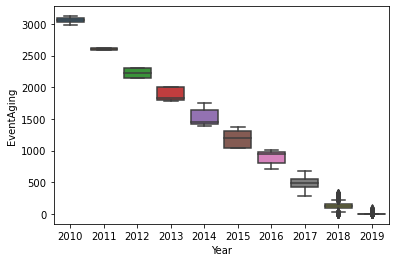

In [103]:
sns.boxplot(x=concatenated_df['Year'], y=concatenated_df['EventAging'], data=concatenated_df)

#### EventAging increases as TradeDate gets older

In [104]:
ProductTypeWithNoType = concatenated_df.ProductType[concatenated_df['Type'].isnull()].unique()
print(len(ProductTypeWithNoType))
print(ProductTypeWithNoType)

12
['IRD_LN_BR' 'EQD_FUT' 'EQD_EQUIT' 'IRD_BOND' 'EQD_EQS' 'COM_FUT'
 'IRD_IRS' 'IRD_SFUT' 'COM_SWAP' 'IRD_CS' 'IRD_CF' 'IRD_LFUT']


In [105]:
ProductTypeWithType = concatenated_df.ProductType[concatenated_df['Type'].notnull()].unique()
print(len(ProductTypeWithType))
print(ProductTypeWithType)

14
['CURR_FXD_SWLEG' 'CURR_FXD_FXD' 'CURR_OPT_FLEX' 'CURR_OPT_SMP'
 'CURR_OPT_BAR' 'EQD_OPT_FLEX' 'SCF_SCF_SCF' 'EQD_OPT_OTC' 'IRD_REPO_REPO'
 'CURR_OPT_RBT' 'EQD_OPT_ORG' 'EQD_REPO_REPO' 'EQD_OPT_BAR'
 'CURR_OPT_BAR2']


In [106]:
#Check if the product types with type null and not null are different
set(ProductTypeWithNoType) == set(ProductTypeWithType)

False

#### The product types that have a NULL type and the product types that have a Type value are mutually exclusive

In [107]:
len(concatenated_df.ProductType.unique())

26

#### There are 26 unique product types

In [108]:
#Number of unique instrumentname
len(concatenated_df.InstrumentName.unique())

1318

#### There are 1318 unique instruments

In [453]:
#Write dataframe to file for ingestion into tool for dashboarding
concatenated_df.to_csv('CNR.csv')